In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# a. Use BigQuery to store and read the data.

The database was downloaded from the page https://www.datos.gov.co/Seguridad-y-Defensa/Homicidios-2018/pz7x-mkbs

In [30]:
datosTotal = pd.read_csv('Homicidios_2018.csv') ## store and read
datosTotal.head(5)

,Fecha,Departamento,Municipio,Día,Hora,Barrio,Zona,Clase de sitio,Arma empleada,Móvil Agresor,Móvil Victima,Edad,Sexo,Estado civil,País de nacimiento,Clase de empleado,Profesión,Escolaridad,Código DANE,Cantidad
0,01/01/2018 12:00:00 AM,AMAZONAS,LETICIA (CT),Lunes,9:45:00,ESPERANZA,URBANA,VIAS PUBLICAS,ARMA BLANCA / CORTOPUNZANTE,A PIE,A PIE,16.0,MASCULINO,SOLTERO,BRASIL,EMPLEADO PARTICULAR,-,SECUNDARIA,"91,001,000",1
1,01/01/2018 12:00:00 AM,AMAZONAS,LETICIA (CT),Lunes,9:45:00,ESPERANZA,URBANA,VIAS PUBLICAS,ARMA BLANCA / CORTOPUNZANTE,A PIE,A PIE,17.0,MASCULINO,SOLTERO,BRASIL,EMPLEADO PARTICULAR,-,SECUNDARIA,"91,001,000",1
2,01/01/2018 12:00:00 AM,ANTIOQUIA,ANDES,Lunes,8:30:00,ALTO DEL CEDRON,RURAL,VIAS PUBLICAS,ARMA DE FUEGO,A PIE,A PIE,26.0,MASCULINO,SOLTERO,COLOMBIA,INDEPENDIENTE,-,PRIMARIA,"5,034,000",1
3,01/01/2018 12:00:00 AM,ANTIOQUIA,ANDES,Lunes,2:30:00,PARQUE PRINCIPAL,RURAL,PARQUES,ARMA BLANCA / CORTOPUNZANTE,A PIE,A PIE,30.0,MASCULINO,SOLTERO,COLOMBIA,AGRICULTOR,-,PRIMARIA,"5,034,000",1
4,01/01/2018 12:00:00 AM,ANTIOQUIA,ANORÍ,Lunes,3:30:00,TENCHE,RURAL,"BARES, CANTINAS Y SIMILARES",ARMA BLANCA / CORTOPUNZANTE,A PIE,A PIE,25.0,MASCULINO,UNION LIBRE,COLOMBIA,INDEPENDIENTE,-,PRIMARIA,"5,040,000",1


In [34]:
datosTotal.shape  #Encontrar perímeto y layout de la base

(4966, 20)

# 2. What data quality issues do you evidence?

In [38]:
datosTotal.groupby("Arma empleada").Barrio.nunique()

Arma empleada
ALMOHADA                                 3
ARMA BLANCA / CORTOPUNZANTE            909
ARMA DE FUEGO                         2217
ARTEFACTO EXPLOSIVO/CARGA DINAMITA       3
BOLSA PLASTICA                           6
CINTAS/CINTURON                          7
COMBUSTIBLE                              7
CONTUNDENTES                           190
CUERDA/SOGA/CADENA                      13
GRANADA DE MANO                          2
MINA ANTIPERSONA                         4
MOTO BOMBA                               1
NO REPORTADO                             3
QUIMICOS                                 1
SIN EMPLEO DE ARMAS                      1
Name: Barrio, dtype: int64

The field "Arma empleada" have 3 rows called "NO REPORTADO" and this is a issue of Data quiality because there is no completeness

In [39]:
datosTotal.groupby("Móvil Agresor").Barrio.nunique()

Móvil Agresor
-                           9
A PIE                    2579
BICICLETA                  16
CONDUCTOR MOTOCICLETA      98
CONDUCTOR TAXI              7
CONDUCTOR VEHICULO         17
PASAJERO BARCO              5
PASAJERO BUS                3
PASAJERO MOTOCICLETA      503
PASAJERO TAXI              19
PASAJERO VEHICULO          28
Name: Barrio, dtype: int64

The field "Móvil Agresor" have 9 rows called "--". In the field "Arma empleada" the missing is "NO REPORTADO" and in other cases the missing is "--". The default alues are not congruent

In [77]:
datosTotal.groupby("Profesión").Hora.nunique()

Profesión
-                                                          821
ADMINISTRACION  COMERCIAL                                    2
ADMINISTRACION  DE EMPRESAS                                  2
ADMINISTRACION  POLICIAL                                     1
ADMINISTRACION  PUBLICA                                      1
COMUNICACION SOCIAL- PERIODISMO                              1
CONTADURIA PUBLICA                                           2
DERECHO                                                      4
FILOSOFIA                                                    1
INGENIERO                                                    4
INGENIERÍA DE SISTEMAS                                       1
INGENIERÍA INDUSTRIAL                                        2
INGENIERÍA MECANICA                                          1
LICENCIADO                                                   4
LICENCIATURA EN BIOLOGIA Y EDUCACION AMBIENTAL               1
NO REPORTADA                                 

The field "Móvil Agresor" have 821 rows called "-". This field don´t have quality because are more missing rows

In [49]:
datosTotal[['Escolaridad','Edad']].loc[datosTotal['Edad'] == 1]

,Escolaridad,Edad
704,ANALFABETA,1.0
2871,NO REPORTADO,1.0


In this case, it's obios that a person who is one year old is "ALAFABETA", these rows should be homologated

# 3 Explore the data and answer these questions using Pandas or Koalas, Matplotlib or Potly to find more insights.

a. What were the top municipalities with highest quantity of murders by month?

 In QSL: select municipio, count(*) from datosTotal order by municipio dsc, y phyton is a similar process

In [60]:
preg3 = datosTotal.groupby("Municipio").Barrio.nunique().sort_values()
preg3

Municipio
PAJARITO                     1
NOCAIMA                      1
NEMOCÓN                      1
EL CANTÓN DEL SAN PABLO      1
EL CARMEN DE ATRATO          1
MONTERREY                    1
TANGUA                       1
TÁMESIS                      1
MONTECRISTO                  1
MONTEBELLO                   1
EL COLEGIO                   1
MONIQUIRÁ                    1
EL DONCELLO                  1
EL DOVIO                     1
EL LITORAL DEL SAN JUAN      1
MOMPÓS                       1
MISTRATÓ                     1
EL ROSAL                     1
TARSO                        1
EL TABLÓN DE GÓMEZ           1
MEDIO BAUDÓ                  1
TENERIFE                     1
ENTRERRIOS                   1
MARULANDA                    1
DUITAMA                      1
MAPIRIPÁN                    1
ULLOA                        1
NUNCHÍA                      1
SUBACHOQUE                   1
SUCRE                        1
                          ... 
BUENAVENTURA                2

The top municipalities are BOGOTÁ, CALI, MEDELLIN, SAN ANDRES DE TUMACO and BARRANQUILLA

3 B. For Bogota, what neighborhoods reported greater amount of murders between 6 at night and 12 midnight.

In [70]:
tabla3b = datosTotal.loc[datosTotal['Municipio'] == 'BOGOTÁ D.C. (CT)'].loc[datosTotal['Hora'] > '18:00:00']
tabla3b
# No necesari filter  <  '23:59:59' because is the top

,Fecha,Departamento,Municipio,Día,Hora,Barrio,Zona,Clase de sitio,Arma empleada,Móvil Agresor,Móvil Victima,Edad,Sexo,Estado civil,País de nacimiento,Clase de empleado,Profesión,Escolaridad,Código DANE,Cantidad
35,01/01/2018 12:00:00 AM,CUNDINAMARCA,BOGOTÁ D.C. (CT),Lunes,1:00:00,SANTA LIBRADA E-5,URBANA,VIAS PUBLICAS,ARMA BLANCA / CORTOPUNZANTE,A PIE,A PIE,22.0,FEMENINO,SOLTERO,COLOMBIA,DESEMPLEADO,-,SECUNDARIA,"11,001,000",1
36,01/01/2018 12:00:00 AM,CUNDINAMARCA,BOGOTÁ D.C. (CT),Lunes,5:30:00,LOS TRES REYES - I ETAPA E-19,URBANA,VIAS PUBLICAS,ARMA BLANCA / CORTOPUNZANTE,A PIE,A PIE,17.0,MASCULINO,SOLTERO,COLOMBIA,DESEMPLEADO,-,SECUNDARIA,"11,001,000",1
37,01/01/2018 12:00:00 AM,CUNDINAMARCA,BOGOTÁ D.C. (CT),Lunes,2:30:00,SAN ANTONIO E-15,URBANA,CASAS DE HABITACION,ARMA BLANCA / CORTOPUNZANTE,A PIE,A PIE,30.0,MASCULINO,UNION LIBRE,COLOMBIA,INDEPENDIENTE,-,SECUNDARIA,"11,001,000",1
38,01/01/2018 12:00:00 AM,CUNDINAMARCA,BOGOTÁ D.C. (CT),Lunes,2:35:00,CENTRO USME E-5,URBANA,VIAS PUBLICAS,ARMA BLANCA / CORTOPUNZANTE,A PIE,A PIE,24.0,MASCULINO,UNION LIBRE,COLOMBIA,EMPLEADO PARTICULAR,-,SECUNDARIA,"11,001,000",1
39,01/01/2018 12:00:00 AM,CUNDINAMARCA,BOGOTÁ D.C. (CT),Lunes,7:45:00,LA PRIMAVERA E-7,URBANA,VIAS PUBLICAS,ARMA BLANCA / CORTOPUNZANTE,A PIE,A PIE,43.0,MASCULINO,UNION LIBRE,COLOMBIA,DESEMPLEADO,-,SECUNDARIA,"11,001,000",1
40,01/01/2018 12:00:00 AM,CUNDINAMARCA,BOGOTÁ D.C. (CT),Lunes,9:25:00,SIERRA MORENA E-19,URBANA,VIAS PUBLICAS,ARMA BLANCA / CORTOPUNZANTE,A PIE,A PIE,19.0,MASCULINO,SOLTERO,COLOMBIA,DESEMPLEADO,-,SECUNDARIA,"11,001,000",1
41,01/01/2018 12:00:00 AM,CUNDINAMARCA,BOGOTÁ D.C. (CT),Lunes,4:07:00,CHUNIZA E-5,URBANA,VIAS PUBLICAS,ARMA DE FUEGO,A PIE,A PIE,19.0,MASCULINO,SOLTERO,COLOMBIA,EMPLEADO PARTICULAR,-,SECUNDARIA,"11,001,000",1
42,01/01/2018 12:00:00 AM,CUNDINAMARCA,BOGOTÁ D.C. (CT),Lunes,5:13:00,GRAN YOMASA E-5,URBANA,VIAS PUBLICAS,ARMA BLANCA / CORTOPUNZANTE,A PIE,A PIE,15.0,MASCULINO,SOLTERO,COLOMBIA,ESTUDIANTE,-,SECUNDARIA,"11,001,000",1
43,01/01/2018 12:00:00 AM,CUNDINAMARCA,BOGOTÁ D.C. (CT),Lunes,3:28:00,LUIS CARLOS GALAN E-10,URBANA,VIAS PUBLICAS,ARMA BLANCA / CORTOPUNZANTE,A PIE,A PIE,33.0,MASCULINO,UNION LIBRE,COLOMBIA,EMPLEADO PARTICULAR,-,PRIMARIA,"11,001,000",1
44,01/01/2018 12:00:00 AM,CUNDINAMARCA,BOGOTÁ D.C. (CT),Lunes,4:19:00,JUAN REY E-4,URBANA,VIAS PUBLICAS,ARMA BLANCA / CORTOPUNZANTE,A PIE,A PIE,22.0,MASCULINO,SOLTERO,COLOMBIA,EMPLEADO PARTICULAR,-,SECUNDARIA,"11,001,000",1


In [74]:
preg3b = tabla3b.groupby("Barrio").Hora.nunique().sort_values()
preg3b

Barrio
ALQUERIAS DE LA FRAGUA E-8       1
LOS COMUNEROS E-16               1
LOS EJIDOS E-16                  1
LOS NARANJOS EL RETAZO E-7       1
LOS PINOS E-5                    1
LOS SAUCES E-16                  1
LOS TRES REYES - I ETAPA E-19    1
LUCERO ALTO E-19                 1
LUCERO MEDIO E-19                1
LUIS CARLOS GALAN E-10           1
MADELENA I Y II SECTOR E-19      1
LIBERTADOR SUR E-18              1
MANZANARES E-7                   1
MARÍA CANO E-19                  1
MEISSEN E-19                     1
MODELIA E-9                      1
MOLINOS DEL SUR E-18             1
MURILLO TORO E-18                1
MUZU E-16                        1
NORMANDIA E-10                   1
NUEVA ARGENTINA E-19             1
NUEVA TIBABUYES E-11             1
OLARTE E-7                       1
MARRUECOS E-18                   1
LAS QUINTAS DEL SUR E-19         1
LAS ORQUÍDEAS E-1                1
LAS NIEVES E-3                   1
LA CONCEPCION E-7                1
LA ESPERANZA 

The neighborhoods the 5 reported greater amount of murders between 6 at night and 12 midnight are CARACOLI E-19, LA FAVORITA E-14, SAN FRANCISCO E-19   , ARBORIZADORA ALTA E-19 and JUAN PABLO II E-19

3 C. What other insights can you extract from this dataset?

there are fields that are not significant like "Profesión" (because have many missing fields ) and "Código DANE" because the code does not give us relevant information

Doing a combination of fields like Clase de sitio and Móvil Agresor can make a correlation of fields. or Zona and Clase de sitio


# 4. Would make sense a machine learning model for supporting the police force in its work? 

If it makes sense since the concentration is on the neighborhoods and the information is well segmented, however, there is too little data to make a sophisticated model. The base would be more productive if there were geospatial coordinates to be able to establish nearby neighborhoods and not consider them as separate points

# 4 b What kind of model would you choose (regression, classification, clustering)? Train one and evaluate its performance.

I think it is better to clustering because we have an unsupervised model, since we do not have a flag to differentiate more serious homicides than others



I feel that a linear regression only serves to study the relationship between variables but the objective is to find the groups where there are more homicides in order to intervene more with the public force

In [86]:
# I Uses  dummy variables with the fiel "Arma empleada" 
dummy_arma=pd.get_dummies(datosTotal["Arma empleada"])
dummy_arma.head()

,ALMOHADA,ARMA BLANCA / CORTOPUNZANTE,ARMA DE FUEGO,ARTEFACTO EXPLOSIVO/CARGA DINAMITA,BOLSA PLASTICA,CINTAS/CINTURON,COMBUSTIBLE,CONTUNDENTES,CUERDA/SOGA/CADENA,GRANADA DE MANO,MINA ANTIPERSONA,MOTO BOMBA,NO REPORTADO,QUIMICOS,SIN EMPLEO DE ARMAS
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [88]:
column_arma = dummy_arma.columns.values.tolist()
column_arma

['ALMOHADA',
 'ARMA BLANCA / CORTOPUNZANTE',
 'ARMA DE FUEGO',
 'ARTEFACTO EXPLOSIVO/CARGA DINAMITA',
 'BOLSA PLASTICA',
 'CINTAS/CINTURON',
 'COMBUSTIBLE',
 'CONTUNDENTES',
 'CUERDA/SOGA/CADENA',
 'GRANADA DE MANO',
 'MINA ANTIPERSONA',
 'MOTO BOMBA',
 'NO REPORTADO',
 'QUIMICOS',
 'SIN EMPLEO DE ARMAS']

In [87]:
# I Uses  dummy variables with the fiel "Móvil Agresor" 
dummy_agresor=pd.get_dummies(datosTotal["Móvil Agresor"])
dummy_agresor.head()

,-,A PIE,BICICLETA,CONDUCTOR MOTOCICLETA,CONDUCTOR TAXI,CONDUCTOR VEHICULO,PASAJERO BARCO,PASAJERO BUS,PASAJERO MOTOCICLETA,PASAJERO TAXI,PASAJERO VEHICULO
0,0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0


In [89]:
column_agresor = dummy_arma.columns.values.tolist()
column_agresor

['ALMOHADA',
 'ARMA BLANCA / CORTOPUNZANTE',
 'ARMA DE FUEGO',
 'ARTEFACTO EXPLOSIVO/CARGA DINAMITA',
 'BOLSA PLASTICA',
 'CINTAS/CINTURON',
 'COMBUSTIBLE',
 'CONTUNDENTES',
 'CUERDA/SOGA/CADENA',
 'GRANADA DE MANO',
 'MINA ANTIPERSONA',
 'MOTO BOMBA',
 'NO REPORTADO',
 'QUIMICOS',
 'SIN EMPLEO DE ARMAS']

In [93]:
df_new = dummy_arma[column_arma].join(dummy_agresor)
df_new

,ALMOHADA,ARMA BLANCA / CORTOPUNZANTE,ARMA DE FUEGO,ARTEFACTO EXPLOSIVO/CARGA DINAMITA,BOLSA PLASTICA,CINTAS/CINTURON,COMBUSTIBLE,CONTUNDENTES,CUERDA/SOGA/CADENA,GRANADA DE MANO,...,A PIE,BICICLETA,CONDUCTOR MOTOCICLETA,CONDUCTOR TAXI,CONDUCTOR VEHICULO,PASAJERO BARCO,PASAJERO BUS,PASAJERO MOTOCICLETA,PASAJERO TAXI,PASAJERO VEHICULO
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [97]:
# Finally we make K means with dummy variables
# Compute k-means clustering.
X = np.array(df_new)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_

array([0, 0, 1, ..., 1, 0, 0])

next is the algorithm of kmeans about two dummy variables, finding 4 clusters that visually look very defined. 
It could be extracted exactly what type of weapon and type of aggressor is correlated.
For example, we could find that thieves who steal by bicycle tend to use a knife and have police routes.
more than security cameras since the routes operate more directly and if the study can be determined, the sector of the city can be found.

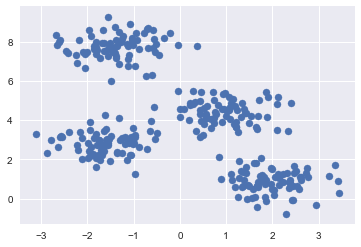

In [101]:
from sklearn.datasets.samples_generator import make_blobs
df_new, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(df_new[:, 0], df_new[:, 1], s=50);

# 5. How would you deploy your model? Propose an architecture and explain it.

The first thing is to understand that the database is insufficient in amount of data, so I would look for a way to feed it daily, not necessarily with streaming but with batch. 

secondly, it would implement a Kmeans model but taking into account that the categorization of neighborhoods, cities and the form of robbery would be done with dummy variables and not directly on qualitative data.

third, I would find a way to create a data quality repository using a control model to guarantee tests such as KPIs or QAs